# Proyecto de ciencia de datos integrando Phyton y R


##Información del dataset seleccionado:

Este [conjunto de datos](https://www.kaggle.com/datasets/oktayrdeki/ddos-traffic-dataset) contiene diversos datos de red para examinar el impacto de un ataque DDoS (denegación de servicio distribuida) en el tráfico de la red. Los datos constan de 1.048.444 filas, que incluyen información de comunicación de diferentes capas de red, direcciones IP de origen y destino, números de puerto, longitudes de paquetes, cantidad de paquetes enviados e intervalos de tiempo.



In [4]:
#Carga de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Carga de dataset
df = pd.read_csv('/content/DDoS_dataset.csv')

In [ ]:
# Tamaño del dataset
print("Filas y columnas:", df.shape)

Filas y columnas: (501293, 9)


In [6]:
# Tipos de datos
print(df.dtypes)

Highest Layer       object
Transport Layer     object
Source IP            int64
Dest IP             object
Source Port          int64
Dest Port            int64
Packet Length        int64
Packets/Time       float64
target               int64
dtype: object


In [7]:
# Primeras filas
df.head()

,Highest Layer,Transport Layer,Source IP,Dest IP,Source Port,Dest Port,Packet Length,Packets/Time,target
0,ARP,UDP,1,192.168.1.1,0,0,60,92.8,1
1,ARP,UDP,0,192.168.1.10,0,0,42,92.9,0
2,ARP,UDP,1,192.168.1.1,0,0,60,362.8,1
3,ARP,UDP,0,192.168.1.12,0,0,42,362.8,0
4,ARP,UDP,1,192.168.1.1,0,0,60,364.3,1


In [8]:
# Últimas filas
df.tail()

,Highest Layer,Transport Layer,Source IP,Dest IP,Source Port,Dest Port,Packet Length,Packets/Time,target
852580,DATA,UDP,0,192.168.1.1,50890,5201,834,19.3,0
852581,DATA,UDP,0,192.168.1.1,50890,5201,834,19.8,0
852582,DATA,UDP,0,192.168.1.1,50890,5201,834,20.3,0
852583,DATA,UDP,0,192.168.1.1,50890,5201,834,20.8,0
852584,DATA,UDP,0,192.168.1.1,50890,5201,834,21.4,0


# **Analisis de valores nulos**

In [9]:
# Contar valores nulos por columna
df.isnull().sum()

,0
Highest Layer,0
Transport Layer,0
Source IP,0
Dest IP,0
Source Port,0
Dest Port,0
Packet Length,0
Packets/Time,0
target,0


In [10]:
# Contar valores n/a por columna
df.isna().sum()

,0
Highest Layer,0
Transport Layer,0
Source IP,0
Dest IP,0
Source Port,0
Dest Port,0
Packet Length,0
Packets/Time,0
target,0


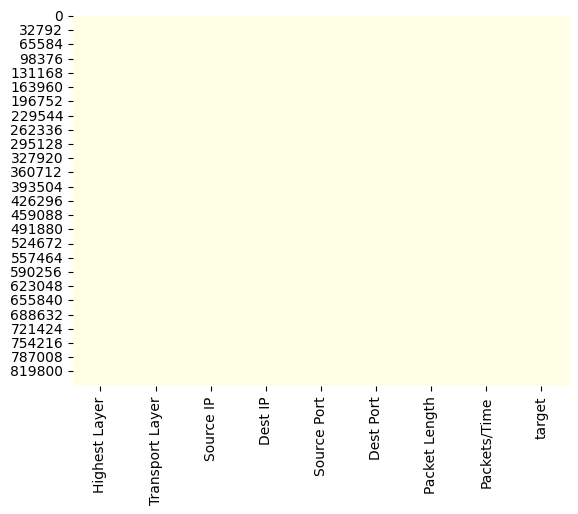

In [12]:
# Visualización de valores nulos
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrBr');

#Confirmacion no posee valores nulos

# Distribución de variables

In [13]:
# Estadísticas descriptivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Source IP,852585.0,0.466506,0.498877,0.0,0.0,0.0,1.0,1.0
Source Port,852585.0,48986.260599,13175.856007,0.0,49158.0,49158.0,50890.0,65530.0
Dest Port,852585.0,4163.623361,8453.836606,0.0,80.0,5201.0,5201.0,50890.0
Packet Length,852585.0,770.617703,714.423026,42.0,60.0,342.0,1514.0,1514.0
Packets/Time,852585.0,192.782676,143.208412,0.0,28.9,217.9,281.9,484.4
target,852585.0,0.466506,0.498877,0.0,0.0,0.0,1.0,1.0


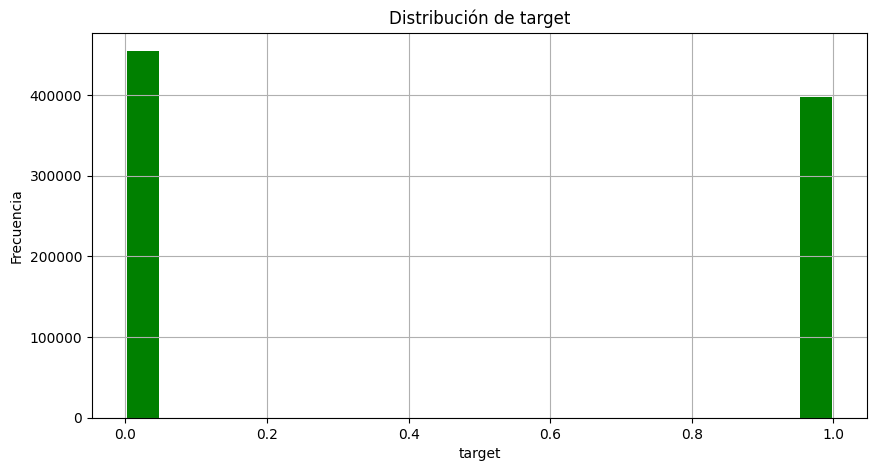

In [17]:
# Histograma
df['target'].hist(figsize=(10, 5), bins=20, color='green', rwidth=0.9)
plt.xlabel('target')
plt.ylabel('Frecuencia')
plt.title('Distribución de target');

# Frecuencias

In [18]:
# Dest IP
df['Dest IP'].value_counts()

,count
Dest IP,
192.168.1.1,798758
192.168.1.3,26568
255.255.255.255,8366
172.16.7.100,5574
ff02::1:2,5193
192.168.1.255,1564
169.254.255.255,1563
172.16.255.255,1122
192.168.1.11,1034


# Análisis de Relaciones Entre Variables

In [19]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num

,Source IP,Source Port,Dest Port,Packet Length,Packets/Time,target
0,1,0,0,60,92.8,1
1,0,0,0,42,92.9,0
2,1,0,0,60,362.8,1
3,0,0,0,42,362.8,0
4,1,0,0,60,364.3,1
...,...,...,...,...,...,...
852580,0,50890,5201,834,19.3,0
852581,0,50890,5201,834,19.8,0
852582,0,50890,5201,834,20.3,0
852583,0,50890,5201,834,20.8,0


In [20]:
# Matriz de correlación
df_num.corr()

,Source IP,Source Port,Dest Port,Packet Length,Packets/Time,target
Source IP,1.000000,0.227624,-0.449707,-0.917677,-0.100678,1.000000
Source Port,0.227624,1.000000,-0.595904,-0.000627,0.325792,0.227624
Dest Port,-0.449707,-0.595904,1.000000,0.117152,0.062427,-0.449707
Packet Length,-0.917677,-0.000627,0.117152,1.000000,0.107142,-0.917677
Packets/Time,-0.100678,0.325792,0.062427,0.107142,1.000000,-0.100678
target,1.000000,0.227624,-0.449707,-0.917677,-0.100678,1.000000


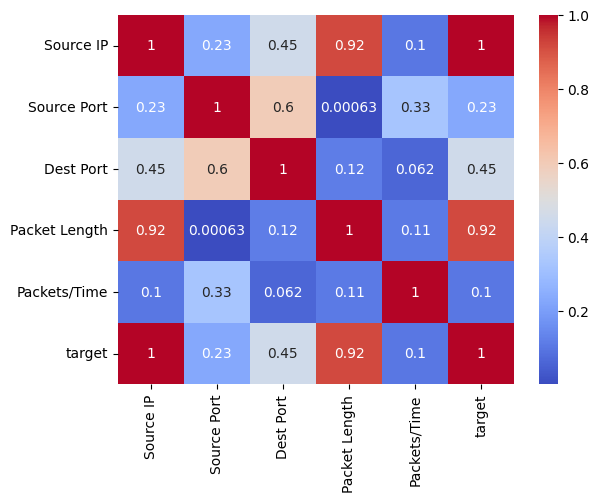

In [21]:
# Mapa de calor
sns.heatmap(abs(df_num.corr()), annot=True, cmap='coolwarm');

#Podemos observar que existe una correlacion alta entre la longitud de los paquetes y el objetivo

In [22]:
#Eliminando variable de alta correlacion (Packet Length)
df_num = df_num.drop('Packet Length', axis=1)

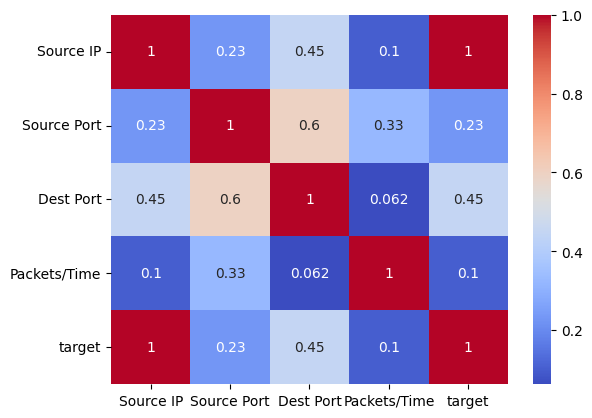

In [23]:
#Comprobando correlación
sns.heatmap(abs(df_num.corr()), annot=True, cmap='coolwarm');
